# LAB 5 : Decision Tree Classifiers in Python

**Definition:**

A Decision Tree Classifier is a supervised machine learning algorithm used for classification tasks. It builds a tree-like model where each internal node represents a decision (feature split) based on a specific feature value. The leaves of the tree represent the final predicted class labels. During prediction, an unseen data point is traversed through the tree based on its feature values, reaching a leaf and receiving the corresponding predicted class label.

**Core Concepts:**

- **Features:** Attributes or independent variables used to predict the target variable.
- **Target Variable:** The variable to be predicted, typically categorical in classification tasks.
- **Decision Node:** An internal node in the tree where a decision is made based on a specific feature value.
- **Leaf Node:** A terminal node in the tree representing a final predicted class label.
- **Splitting Criterion:** A rule used to determine the best feature and its value for splitting at each decision node. Common criteria include information gain and Gini impurity.
- **Overfitting:** Occurs when the model memorizes the training data too well, leading to poor performance on unseen data.

**Algorithm:**

1. **Start with the entire training dataset as the root node.**
2. **Choose the best feature and its value (split point) to split the data into two subsets based on the chosen splitting criterion.**
3. **Recursively apply steps 1 and 2 to each subset, creating a new decision node at each split, until a stopping criterion is met (e.g., reaching a maximum depth, achieving pure node labels, or exceeding a resource limit).**
4. **Assign the most frequent class label in each leaf node as the predicted class.**

**Advantages:**

- **Interpretability:** Decision trees are visually interpretable, allowing understanding of the decision-making process.
- **No need for feature scaling:** Unlike some other algorithms, decision trees don't generally require feature scaling for numerical features.
- **Can handle both categorical and numerical features.**

**Disadvantages:**

- **Prone to overfitting:** Requires careful parameter tuning to avoid memorizing the training data and reducing generalization.
- **Sensitive to noisy data:** Outliers or errors in the data can significantly impact the tree structure and performance.

**Formulas:**

- **Information Gain (Gain(A,B)):** Measures the decrease in entropy (uncertainty) after splitting the dataset based on feature A.
  ```
  Gain(A,B) = Entropy(B) - [ ( |B_a| / |B| ) * Entropy(B_a) + ( |B_b| / |B| ) * Entropy(B_b) ]
  ```
  - `Entropy(B)`: Entropy of the entire dataset B.
  - `|B_a|`: Size of subset B_a after split.
  - `|B_b|`: Size of subset B_b after split.
  - `Entropy(B_a)`: Entropy of subset B_a.
  - `Entropy(B_b)`: Entropy of subset B_b.

- **Gini Impurity:** Measures the probability of a randomly chosen sample being incorrectly labeled if randomly classified according to the distribution of labels in the dataset.
  ```
  Gini(B) = 1 - Σ(p_i)^2
  ```
  - `p_i`: Proportion of samples in B belonging to class i.


In [1]:
from sklearn.datasets import load_iris

In [2]:
iris=load_iris()

In [3]:
X=iris.data

In [4]:
y=iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

In [6]:
X_train.shape

(120, 4)

In [7]:
X_test.shape

(30, 4)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
clf=DecisionTreeClassifier()

In [10]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [11]:
y_pred=clf.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9666666666666667

In [13]:
from sklearn.tree import plot_tree

[Text(0.4444444444444444, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.659\nsamples = 120\nvalue = [38, 34, 48]'),
 Text(0.3333333333333333, 0.75, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.5555555555555556, 0.75, 'x[3] <= 1.75\ngini = 0.485\nsamples = 82\nvalue = [0, 34, 48]'),
 Text(0.4444444444444444, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.224\nsamples = 39\nvalue = [0, 34, 5]'),
 Text(0.2222222222222222, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.1111111111111111, 0.25, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.3333333333333333, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6666666666666666, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.5555555555555556, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.7777777777777778, 0.25, 'x[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.6666666666666666, 0.08333333333333

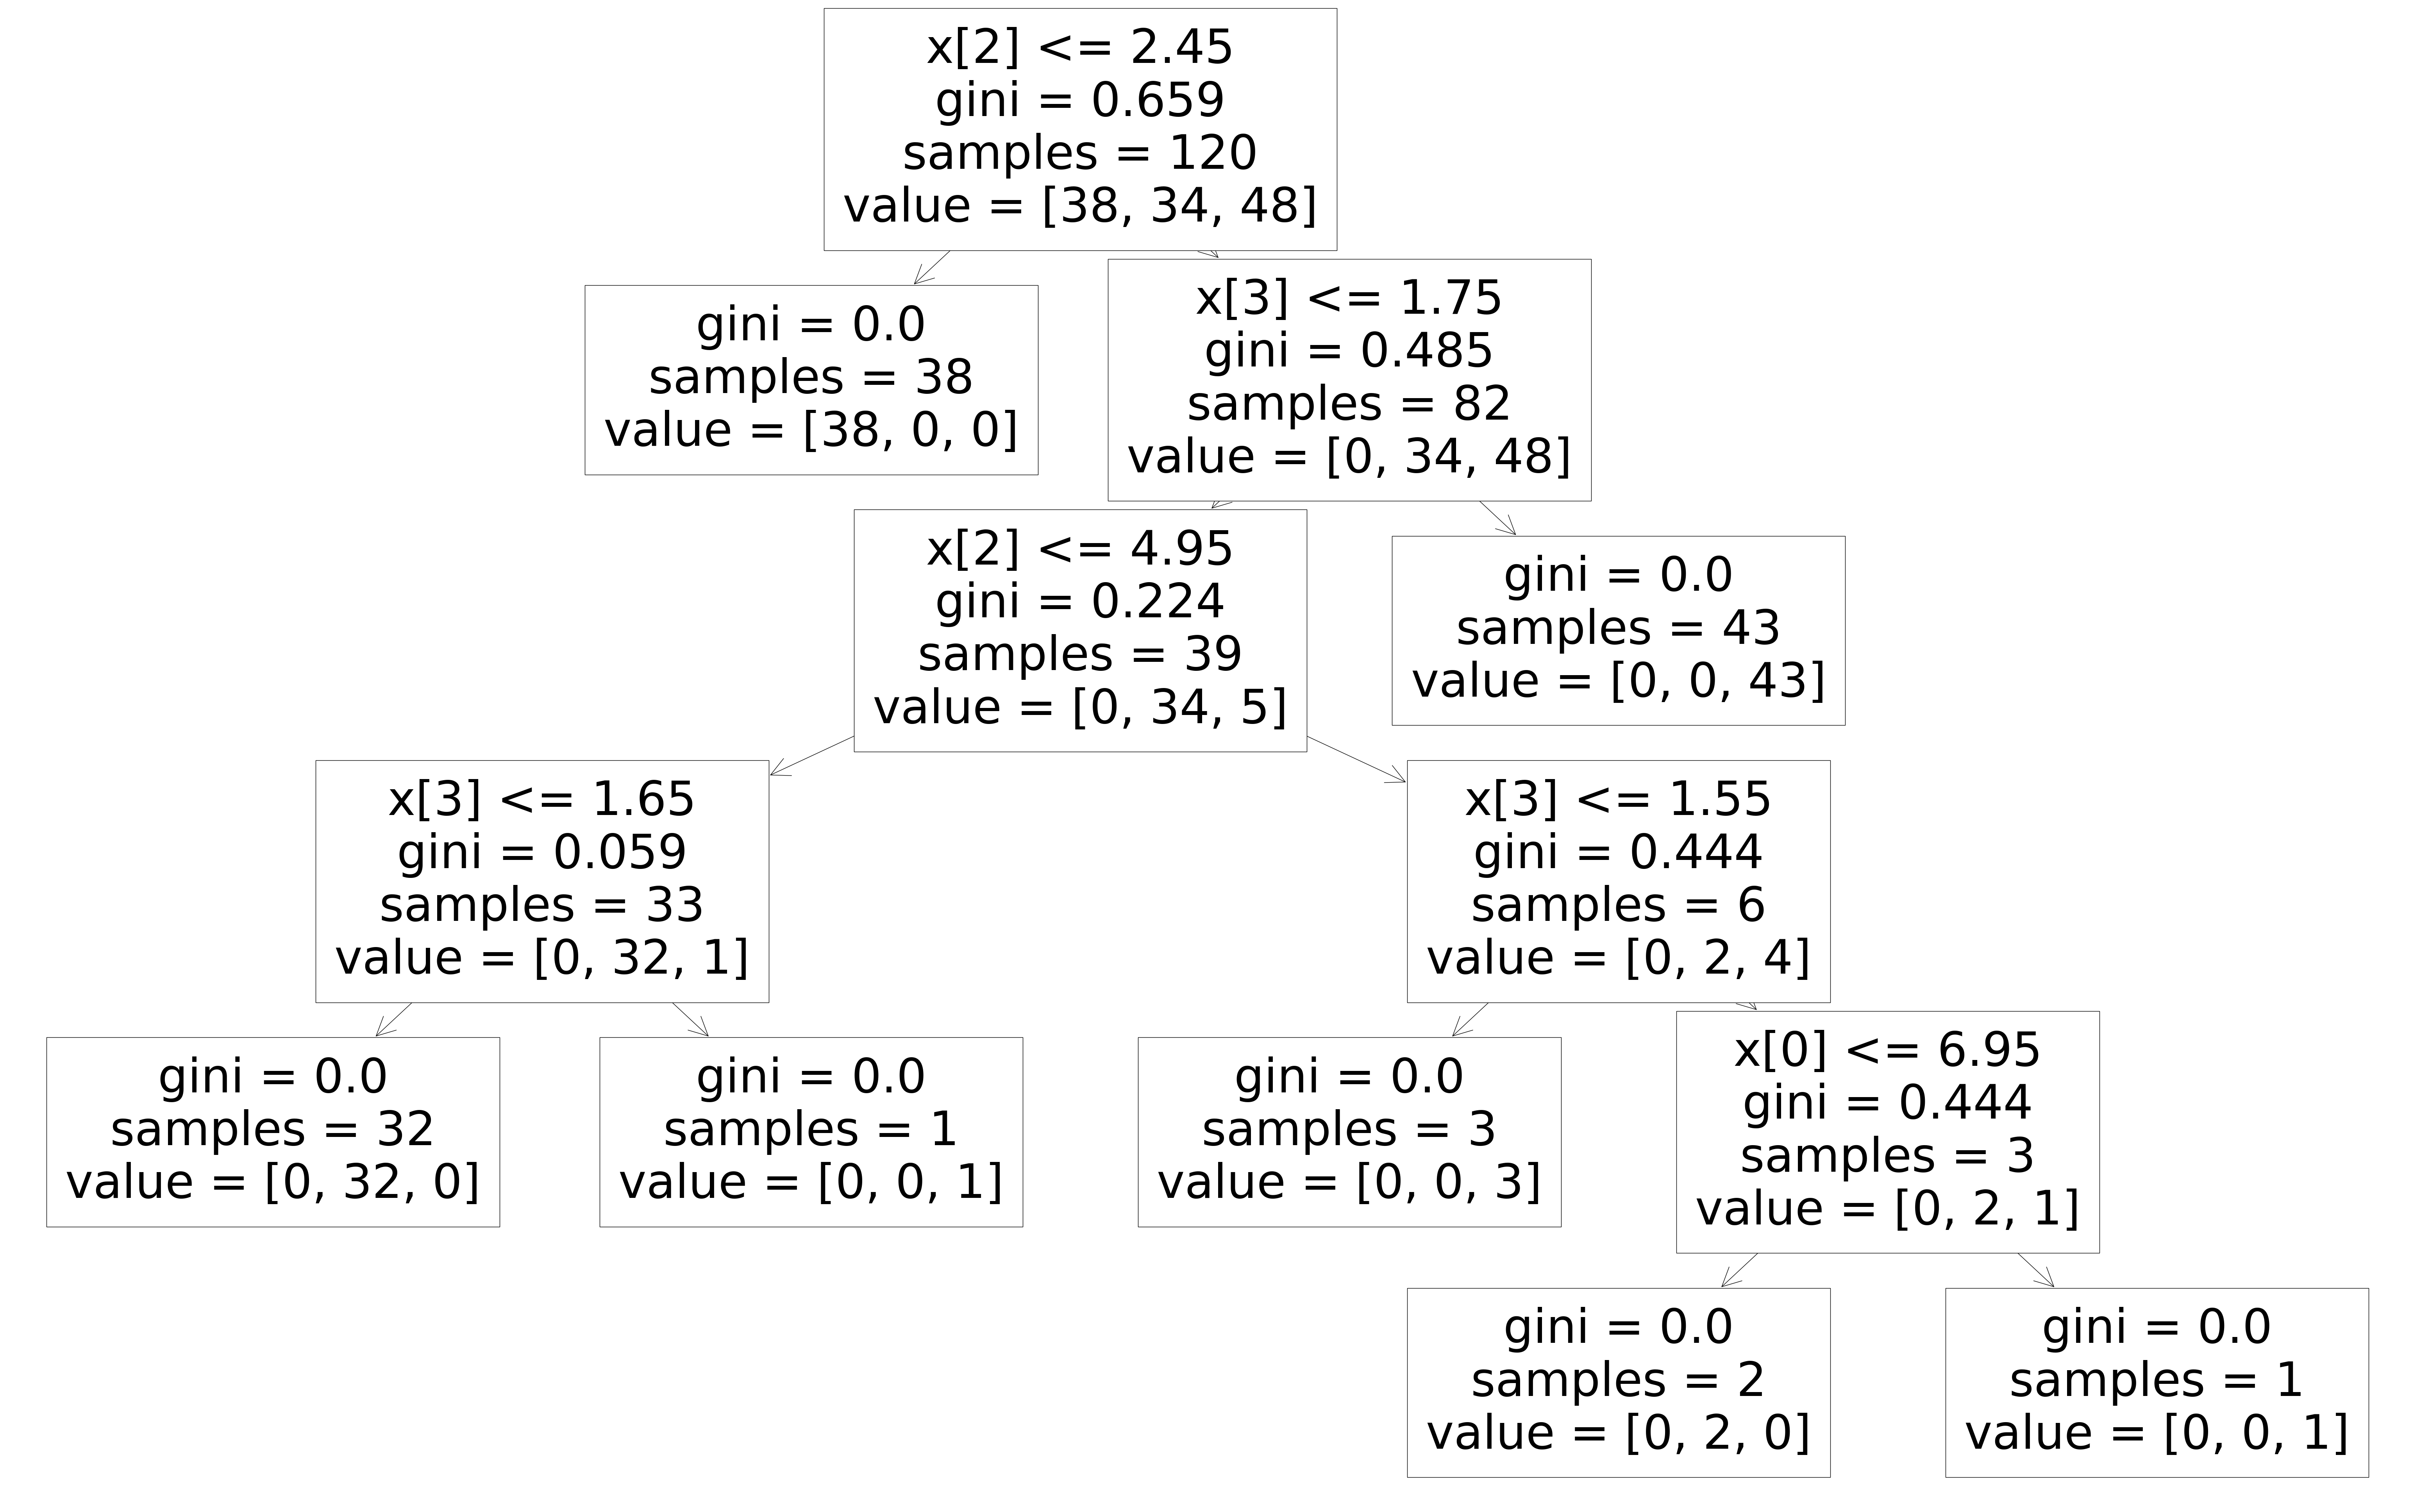

In [14]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80,50

plot_tree(clf)

In [15]:
import numpy as np
import pandas as pd

In [16]:
data=pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [17]:
data['Gender'].replace({'Male':0,'Female':1},inplace=True)

In [18]:
X=data.iloc[:, 1:4].values
y=data.iloc[:,-1].values

In [19]:
X.shape

(400, 3)

In [20]:
y.shape

(400,)

In [21]:
clf1=DecisionTreeClassifier(max_depth=3)

In [22]:
clf1.fit(X,y)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'x[1] <= 42.5\ngini = 0.459\nsamples = 400\nvalue = [257, 143]'),
 Text(0.25, 0.625, 'x[2] <= 90500.0\ngini = 0.271\nsamples = 285\nvalue = [239, 46]'),
 Text(0.125, 0.375, 'x[1] <= 36.5\ngini = 0.072\nsamples = 241\nvalue = [232, 9]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 162\nvalue = [162, 0]'),
 Text(0.1875, 0.125, 'gini = 0.202\nsamples = 79\nvalue = [70, 9]'),
 Text(0.375, 0.375, 'x[2] <= 119000.0\ngini = 0.268\nsamples = 44\nvalue = [7, 37]'),
 Text(0.3125, 0.125, 'gini = 0.413\nsamples = 24\nvalue = [7, 17]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(0.75, 0.625, 'x[1] <= 46.5\ngini = 0.264\nsamples = 115\nvalue = [18, 97]'),
 Text(0.625, 0.375, 'x[2] <= 35500.0\ngini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(0.5625, 0.125, 'gini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.6875, 0.125, 'gini = 0.492\nsamples = 16\nvalue = [7, 9]'),
 Text(0.875, 0.375, 'x[2] <= 41500.0\ngini = 0.196\nsamples = 91\nvalue = [10, 81]

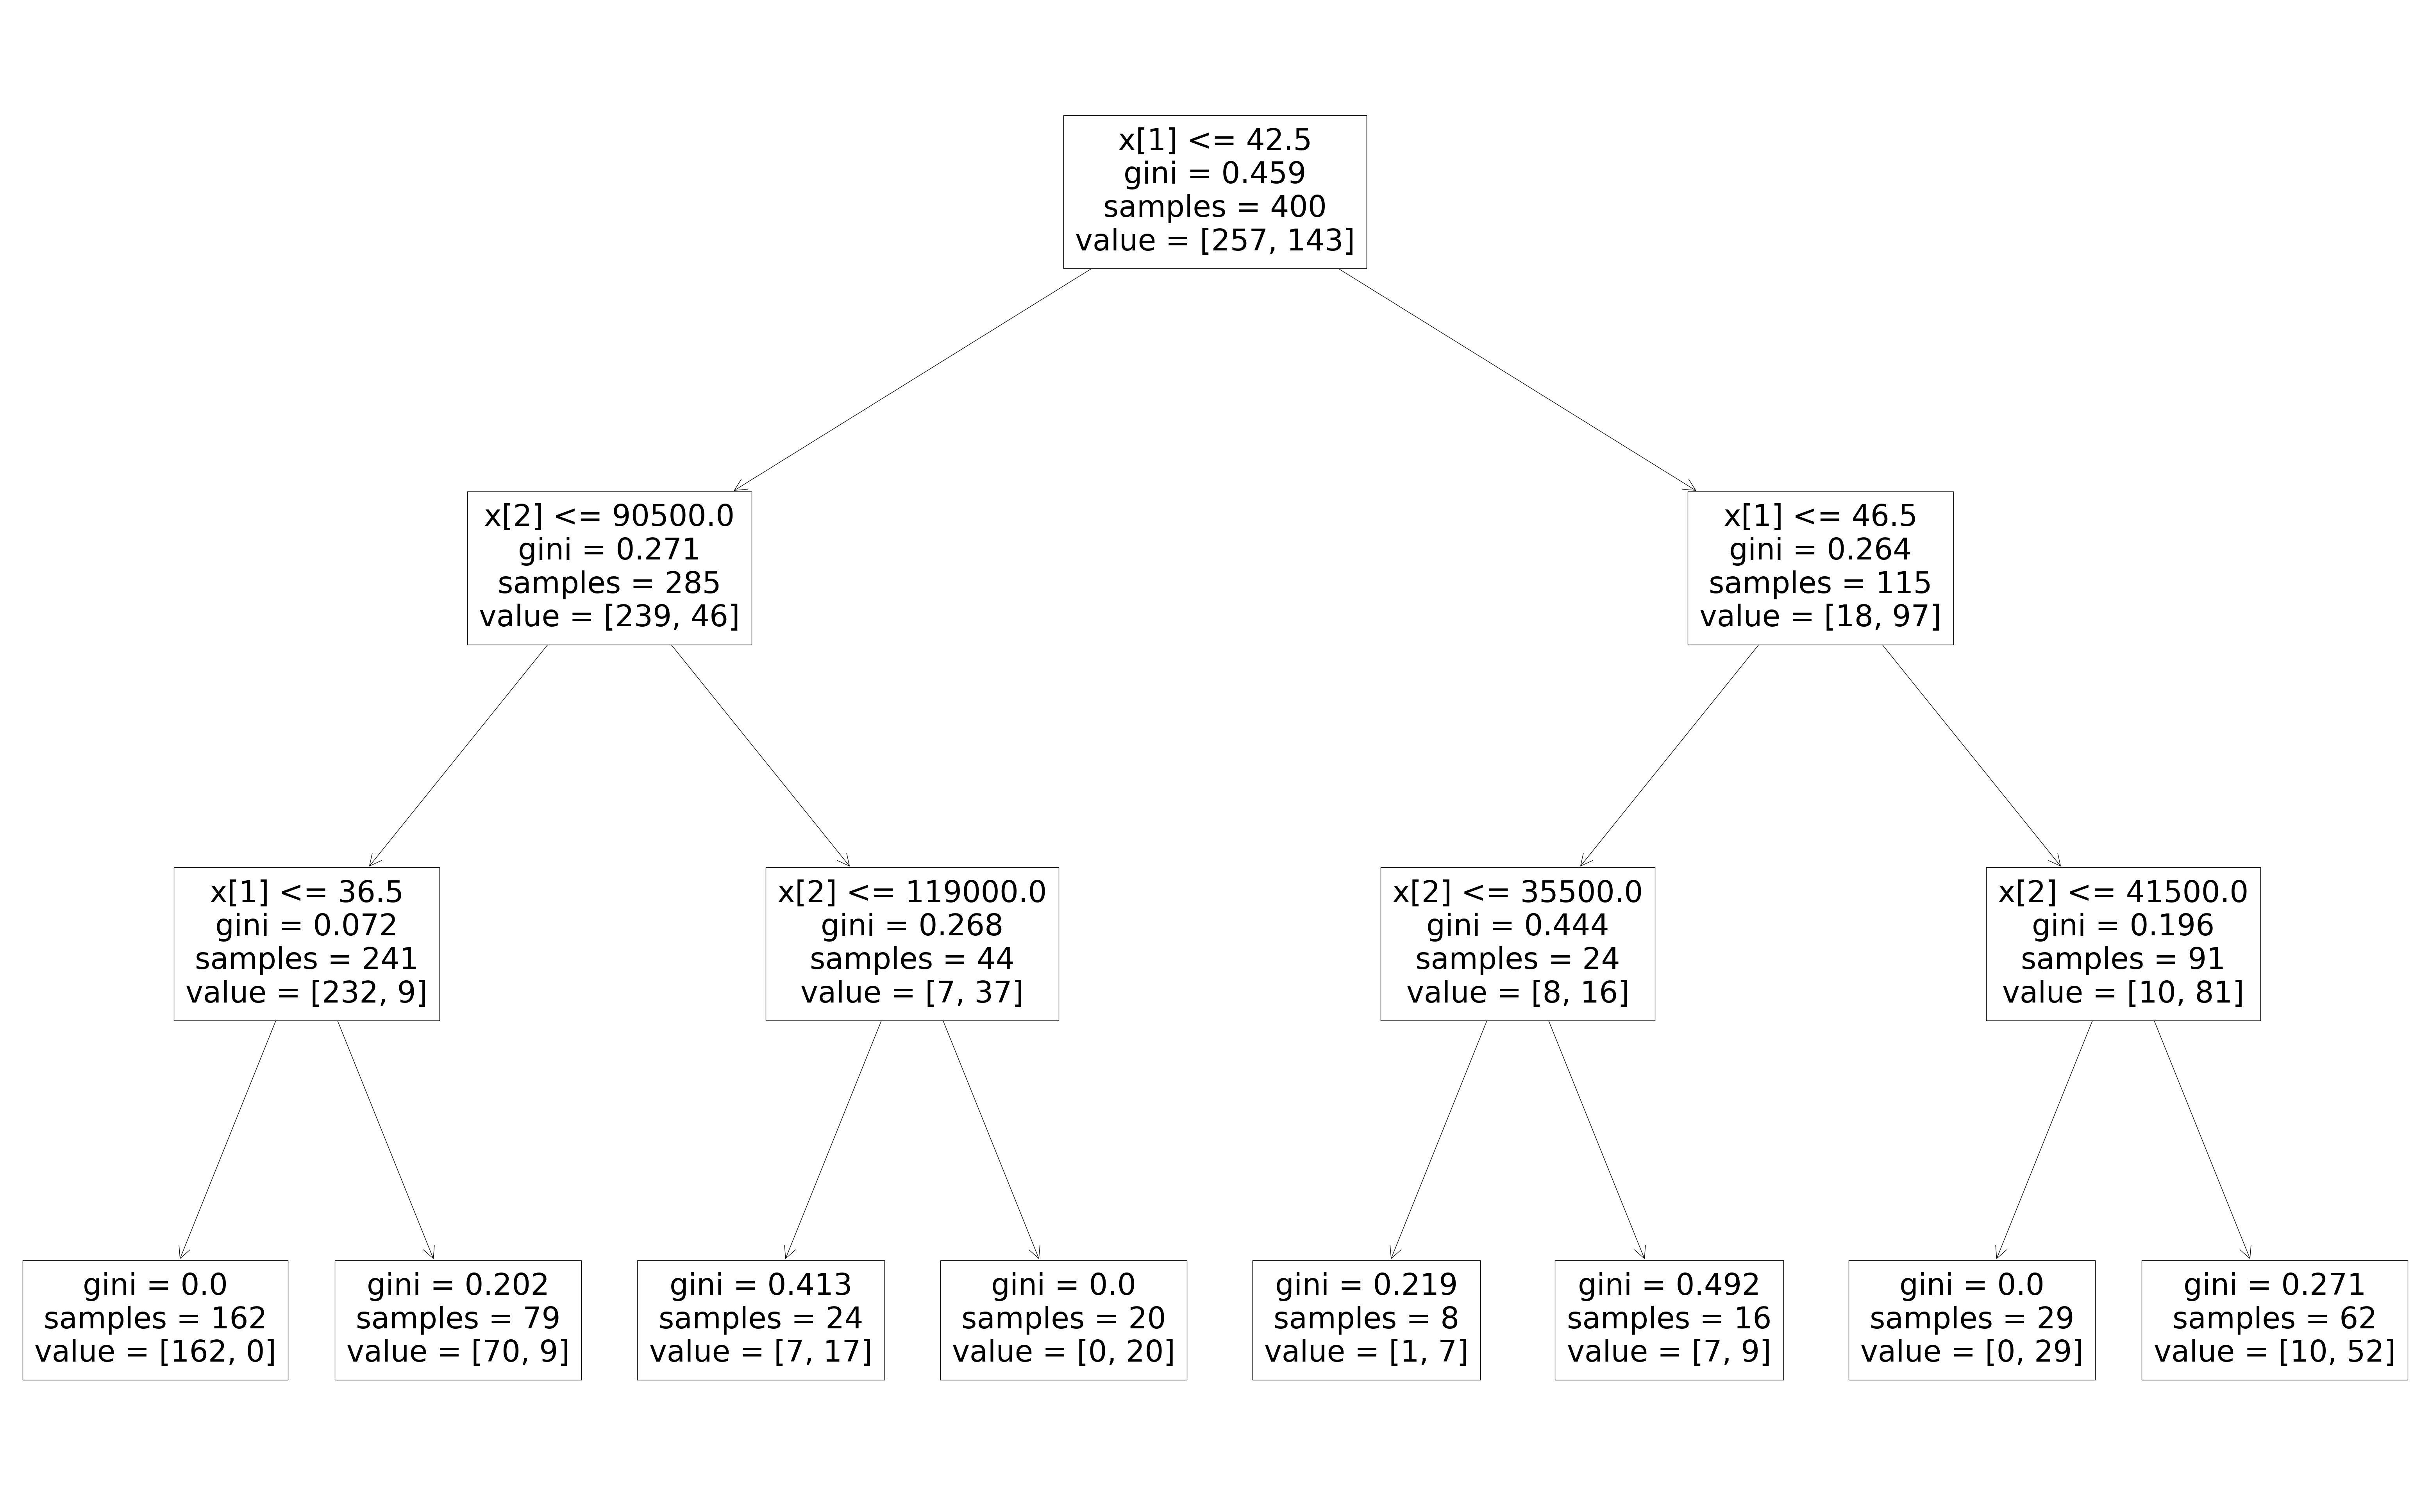

In [23]:
rcParams['figure.figsize'] = 80,50

plot_tree(clf1)